# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Data Science\Datasets\height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

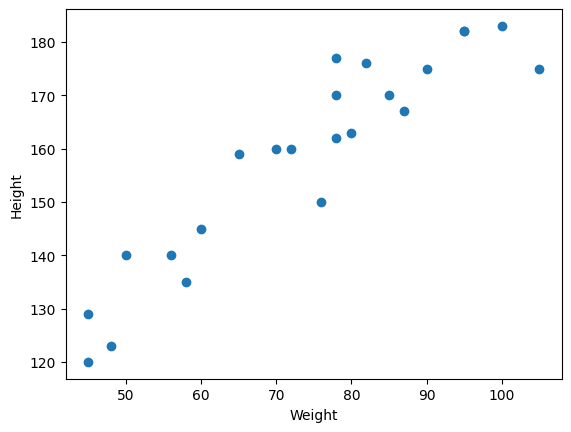

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
# Main aim is to create a best fitbit line

## Process

1. Divide the feature based on the independent and de@endent features
2. Train test split the dataset
3. Standardization
4. Train the model using linear regression

In [6]:
## divide the dataset into independent and dependent 
X=df[['Weight']] ## independent
y=df[["Height"]] ## dependent

In [7]:
## Train test split
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [9]:
X.shape

(23, 1)

In [10]:
X_train.shape

(18, 1)

In [11]:
X_train.shape

(18, 1)

In [12]:
y_train.shape

(18, 1)

In [13]:
y_test.shape

(5, 1)

In [14]:
## standardize the dataste train the independent data
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [18]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

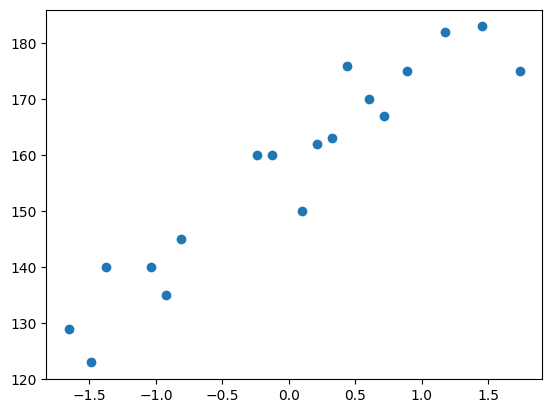

In [19]:
plt.scatter(X_train,y_train)

In [20]:
## Train the model simple linear regression model
from sklearn.linear_model import LinearRegression

In [21]:
regressor = LinearRegression()

In [22]:
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
print("The slope or coefficient of weight is ", regressor.coef_)

The slope or coefficient of weight is  [[17.03440872]]


In [24]:
print("Intercept;", regressor.intercept_)

Intercept; [157.5]


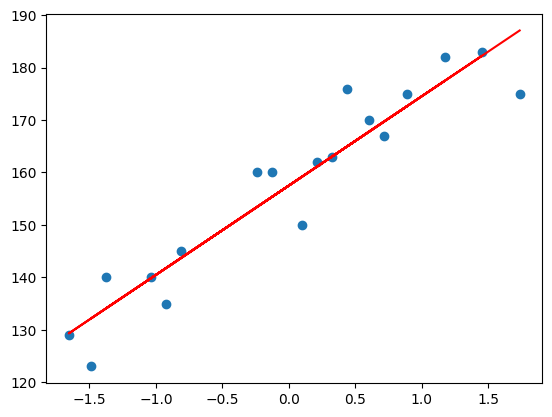

In [25]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')

In [26]:
# Prediction of train data 
# predicted_height_output = intercept + coef_(weights)
# y_pred_train = 157.5 + 17.03(X_train)


In [27]:
# Prediction of test data 
# predicted_height_output = intercept + coef_(weights)
# y_pred_test = 157.5 + 17.03(X_test)

In [28]:
y_pred_test = regressor.predict(X_test)

In [29]:
y_pred_test

array([[161.08467086],
       [161.08467086],
       [129.3041561 ],
       [177.45645118],
       [148.56507414]])

In [30]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


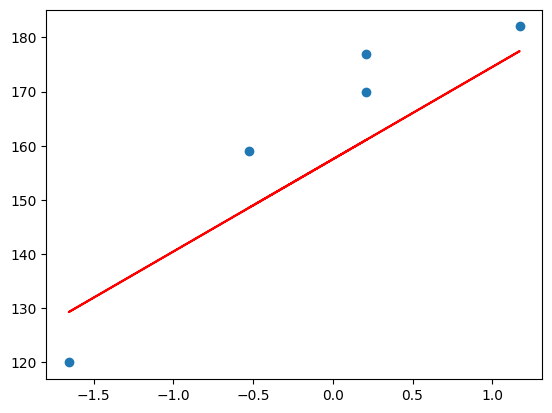

In [31]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),color='red')

In [32]:
## Performance Metrics
## MSE
## MAE
## RMSE
## Rsquare and adjusted square

In [34]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [36]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score ## r square

In [38]:
# Adjusted R Square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [39]:
regressor

LinearRegression()

In [40]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
scaled_weight

array([[0.32350772]])

In [42]:
regressor.predict(scaled_weight)

array([[163.01076266]])

In [43]:
print("The height prediction for weight for 80kg is ",regressor.predict(scaled_weight))

The height prediction for weight for 80kg is  [[163.01076266]]


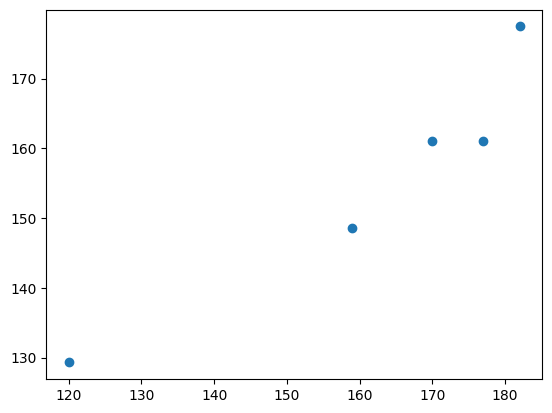

In [44]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [45]:
## Residuals 
residuals = y_test-y_pred_test

In [46]:
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


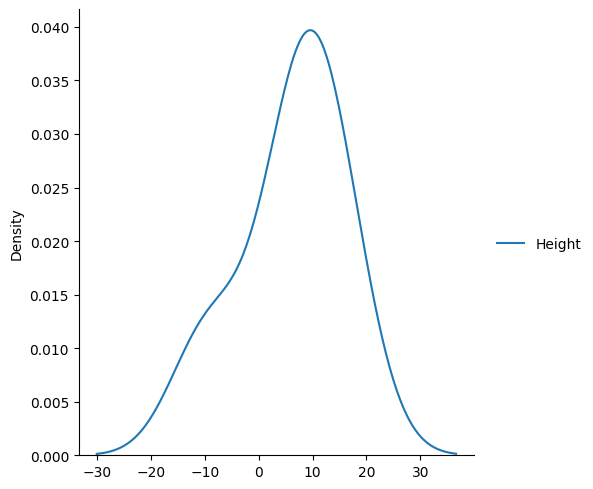

In [47]:
## plot the residuals
sns.displot(residuals,kind='kde')

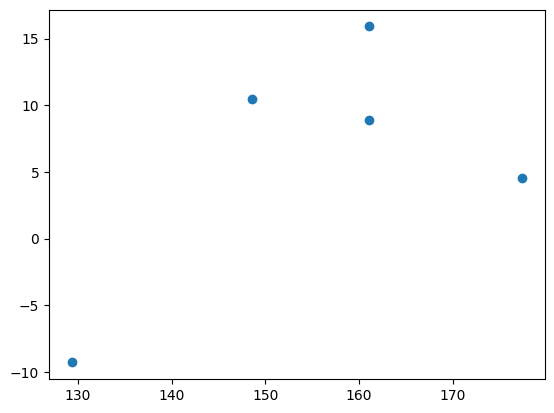

In [48]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

In [49]:
## Pickling the model